In [1]:
import os
from Bio import SeqIO
import statistics
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.style as style
style.use('seaborn-notebook')

In [2]:
folder = '../data/ncbi_16S_genes/'

In [3]:
taxon_folders = [f for f in os.listdir(folder) if '.ipynb' not in f]

In [4]:
fasta_files = []

for taxon in taxon_folders:
    files = [f for f in os.listdir(folder+taxon) if '.ipynb' not in f]
    
    sub_taxon_folders = [(folder+taxon+'/'+f+'/') for f in files if '.fasta' not in f]
    fasta_files.extend([(folder+taxon+'/'+f) for f in files if '.fasta' in f])
    
    for sub_taxon in sub_taxon_folders:
        fasta_files.extend([(sub_taxon+f) for f in os.listdir(sub_taxon) if '.ipynb' not in f])

In [5]:
genes_16S = [SeqIO.parse(file_16S, 'fasta') for file_16S in fasta_files]

In [6]:
g16S = []

for gene_16S in genes_16S:
    for gene_record in gene_16S:
        g16S.append(gene_record.seq)

## Statistics

In [7]:
lengths_16S = [len(g) for g in g16S]
len(lengths_16S)

21677

In [8]:
print(lengths_16S[:10])
print(lengths_16S[-10:])

[1401, 1412, 1410, 1447, 1398, 1432, 1398, 1398, 1398, 1398]
[1421, 1421, 1421, 1421, 1421, 1421, 1421, 1421, 1338, 1327]


In [9]:
min(lengths_16S), max(lengths_16S)

(60, 5670)

In [10]:
print('mean: ', round(statistics.mean(lengths_16S), 2))
print('median: ', statistics.median(lengths_16S))
print('mode: ', statistics.mode(lengths_16S))

mean:  1007.86
median:  1139
mode:  497


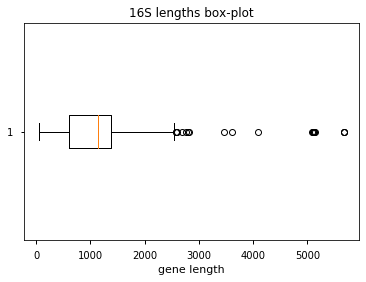

In [11]:
plt.boxplot(lengths_16S, vert=False)
plt.xlabel('gene length')
plt.title('16S lengths box-plot');

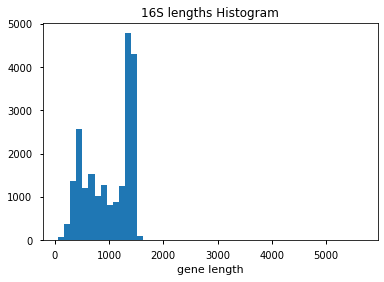

In [12]:
plt.hist(lengths_16S, bins=50)
plt.xlabel('gene length')
plt.title('16S lengths Histogram');

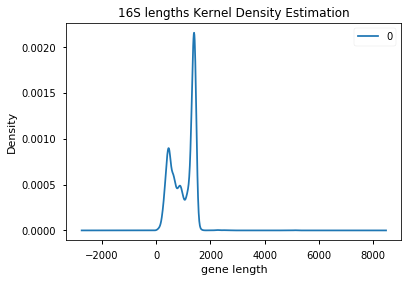

In [13]:
pd.DataFrame(lengths_16S).plot.kde()
plt.xlabel('gene length')
plt.title('16S lengths Kernel Density Estimation');

### Values in the interval

In [16]:
sorted_lengths_16S = sorted(lengths_16S)

# количество генов 16S, длина которых попала в интервал (включительно)
def count_16S_lens(inter_min, inter_max):
    idx_min = 0
    idx_max = len(sorted_lengths_16S)-1
    
    for idx, el in enumerate(sorted_lengths_16S):
        if el >= inter_min:
            idx_min = idx
            break
            
    for idx, el in enumerate(sorted_lengths_16S):
        if el > inter_max:
            idx_max = idx-1
            break
    
    return idx_max - idx_min + 1

In [19]:
count_16S_lens(100, 500)

4320